#Computing In Context
##Social Sciences Track
##Lecture 3--text mining for real
###Matthew L. Jones
###like, with code and stuff


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import textmining_blackboxes as tm

### IMPORTANT: `tm` is *our* temporarily helper, *not* a standard `python` package!! 
download it from my github:
https://github.com/matthewljones/computingincontext

In [3]:
#see if package imported correctly
tm.icantbelieve("butter")

I can't believe it's not butter


##Let's get some text

Assuming that you are storing your data in a directory in the same place as your iPython notebook.

In [4]:
title_info=pd.read_csv('data/na-slave-narratives/data/toc.csv')
#this is the "metadata" of these files--we didn't use today

In [5]:
#Let's use a brittle thing for reading in a directory of pure txt files.
our_texts=tm.readtextfiles('data/na-slave-narratives/data/texts')
#again, this is not a std python package
#returns a simple list of the document as very long strings

In [6]:
len(our_texts)

294

In [42]:
our_texts[100][:300] # first 300 words of 100th text

'\n [Frontispiece Image]\n [Title Page Image]\n CONTENTS\n PREFACE.\n The idea of writing and giving the Church and community the advantage of my experience and such facts as came under my personal observation during the many years of labor I have spent in the A. M. E. Church, has occupied my attention fo'

#list comprehensions!
###most python thing evah!

how many words in each text within `our_texts`? can you make a list?

Sure, you could do this as a `for` loop

    for text in our texts:
        blah.blah.blah(our_texts) #not real code
        
or

    for i in range(len(our_texts)

But super easy in `python`


In [8]:
lengths=[len(text) for text in our_texts]


#How to process text

###Python Libraries

Python has an embarrasment of riches when it comes to working with texts. Some libraries are higher level with simpler, well thought out defaults, namely `pattern` and `TextBlob`. Most general, of long development, and foundational is the Natural Language Tool Kit--NLTK. The ideas we'll learn to today are key--they have slightly different instantiations in the different tools. Not everything is yet in Python 3, alas!!

###nltk : grandparent of text analysis packages, cross-platform, complex

+ crucial for moving beyond bag of words: tagging & other grammatical analysis

###pattern : higher level and easier to use the nltk but Python 2.7 only. (wah!) 

###textblob : even higher level range of natural language processing (3.4 but not yet in conda?)

###scikit learn (sklearn): toolkit for scientists, faster, better (use for processing/memory intensive stuff) (Our choice!)

#Things we might do to clean up text


##tokenization
making `.split` much better 

Examples??

##stemming:
- converting inflected forms into some normalized forms
    - e.g. "chefs" --> "chef"
    - "goes" --> "go"
    - "children" --> "child"

##stopwords
they are the words you don't want to be included:
"from" "to" "a" "they" "she" "he"

##If you need to do lots of such things, you'll want to use ntlk, pattern or TextBlob.


For now, we'll play with the cool scientists and use the powerful and fast scikit learn package.

#Our Zero-ith tool: cleaning up the text
##I've included a little utility function in `tm` that takes a list of strings and cleans it up a bit
###check out the code on your own time later

In [ ]:
our_texts=tm.data_cleanse(our_texts)

#more necessary when have messy text
#eliminate escaped characters

#Our first tool: `vectorizer` from `scikit learn`

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer=TfidfVectorizer(min_df=0.5, stop_words='english', use_idf=True)

In [18]:
document_term_matrix=vectorizer.fit_transform(our_texts)


####for the documentation of sklearn's text data functionality, see http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

##while this works, mini-lecture on crashes
###see `kernel` above. Therein is the secret to eliminating the dreaded *.

In [43]:
# now let's get our vocabulary--the names corresponding to the rows
# "feature" is the general term in machine learning and data mining 
# we seek to characterize data by picking out features that will enable discovery

vocab=vectorizer.get_feature_names()


In [20]:
len(vocab)

1658

In [21]:
document_term_matrix.shape

(294, 1658)

### so  `document_term_matrix` is a matrix with 294 rows--the documents--and 1658 columns--the vocabulary or `terms` or `features`

In [22]:
vocab[1000:1100]

['ought',
 'outside',
 'overseer',
 'owned',
 'owner',
 'owners',
 'page',
 'pages',
 'paid',
 'pain',
 'painful',
 'pains',
 'pair',
 'paper',
 'papers',
 'parents',
 'particular',
 'particularly',
 'parties',
 'parting',
 'parts',
 'party',
 'pass',
 'passage',
 'passed',
 'passing',
 'past',
 'path',
 'pay',
 'paying',
 'peace',
 'peculiar',
 'pen',
 'people',
 'perfect',
 'perfectly',
 'perform',
 'performed',
 'period',
 'permission',
 'permit',
 'permitted',
 'person',
 'personal',
 'persons',
 'peter',
 'philadelphia',
 'picture',
 'piece',
 'pieces',
 'pity',
 'place',
 'placed',
 'places',
 'plain',
 'plan',
 'plans',
 'plantation',
 'play',
 'pleasant',
 'pleased',
 'pleasure',
 'plenty',
 'pocket',
 'point',
 'points',
 'poor',
 'portion',
 'position',
 'possess',
 'possessed',
 'possession',
 'possible',
 'possibly',
 'post',
 'pounds',
 'power',
 'powerful',
 'powers',
 'practice',
 'praise',
 'pray',
 'prayed',
 'prayer',
 'prayers',
 'praying',
 'preach',
 'preached',
 '

#right now stored super efficiently as a *sparse* matrix

almost all zeros--good for our computers' limited memory

easier for us to see as a *dense* matrix



In [23]:
document_term_matrix_dense=document_term_matrix.toarray()


In [24]:
dtmdf=pd.DataFrame(document_term_matrix_dense, columns=vocab)

In [25]:
dtmdf

,10,ability,able,abroad,absence,absent,accept,accepted,accompanied,accomplish,...,wrote,yard,ye,year,years,yes,york,young,younger,youth
0,0.000000,0.002778,0.001837,0.008431,0.000000,0.000000,0.002855,0.007959,0.002445,0.000000,...,0.002333,0.002427,0.009639,0.001776,0.050294,0.014698,0.006708,0.016257,0.000000,0.000000
1,0.000000,0.001035,0.047255,0.002095,0.008032,0.007569,0.001064,0.004944,0.005469,0.002129,...,0.002609,0.032574,0.000000,0.028466,0.046546,0.000000,0.003334,0.089552,0.008616,0.005845
2,0.007761,0.002577,0.022157,0.005214,0.007496,0.005382,0.010594,0.000000,0.006805,0.000000,...,0.000000,0.011259,0.004471,0.028007,0.062745,0.011688,0.004149,0.035189,0.002680,0.000000
3,0.002040,0.028447,0.017471,0.000000,0.013792,0.000000,0.006265,0.009703,0.000000,0.004177,...,0.001707,0.008878,0.000000,0.064955,0.076117,0.001536,0.003271,0.050210,0.019022,0.001912
4,0.005407,0.005386,0.021373,0.000000,0.000000,0.011249,0.016607,0.005144,0.000000,0.000000,...,0.004524,0.023532,0.004672,0.037876,0.084063,0.020356,0.021677,0.045529,0.000000,0.000000
5,0.028843,0.005746,0.015202,0.005814,0.011144,0.000000,0.000000,0.005488,0.005058,0.011812,...,0.004826,0.005021,0.009970,0.091842,0.100450,0.000000,0.009251,0.100886,0.000000,0.016217
6,0.012275,0.012228,0.024262,0.000000,0.000000,0.000000,0.012568,0.000000,0.010763,0.000000,...,0.010271,0.010685,0.000000,0.078175,0.061073,0.009243,0.049214,0.063610,0.012718,0.000000
7,0.000000,0.000000,0.012353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005440,0.000000,0.063682,0.073848,0.000000,0.025056,0.036434,0.000000,0.000000
8,0.000000,0.025964,0.034346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.043617,0.000000,0.067576,0.016600,0.032421,0.000000,0.000000,0.033768,0.027007,0.073277
9,0.000000,0.006766,0.008950,0.006845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011366,0.005912,0.082176,0.008651,0.025345,0.005114,0.000000,0.013199,0.007037,0.050919


####While this data frame is lovely to look at and useful to think with, it's tough on your computer's memory

#Now we can throw wide variety of mining algorithms at our data!

#Similarity and dissimilarity

We reduced our text to a vector of term-weights.

What can we do once we've committed this real violence on the text?

We can measure *distance* and *similarity*

I know. Crazy talk.

Right now our text is just a series of numbers, indexed to words. We can treat it like any collection of vectors more or less. 

And the key way to distinguish two vectors is by measuring their distance or computing their similiarity (`1-distance`).

You already know how, though you may have buried it along with memories of high school.

#Many distance metrics to choose from
## key one in textual analysis:
### cosine similarity

If $\mathbf{a}$ and $\mathbf{b}$ are vectors, then

$\mathbf{a}\cdot\mathbf{b}=\left\|\mathbf{a}\right\|\left\|\mathbf{b}\right\|\cos\theta$

Or

$\text{similarity} = \cos(\theta) = {A \cdot B \over \|A\| \|B\|} = \frac{ \sum\limits_{i=1}^{n}{A_i \times B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{(A_i)^2}} \times \sqrt{\sum\limits_{i=1}^{n}{(B_i)^2}} }$

(h/t wikipedia)

In [26]:
#easy to program, but let's use a robust version from sklearn!
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
similarity=cosine_similarity(document_term_matrix)

#Note here that the `cosine_similiary` can take 
#an entire matrix as its argument

In [28]:
#what'd we get?

similarity

array([[ 1.        ,  0.4800956 ,  0.47789776, ...,  0.41147251,
         0.64107903,  0.49087961],
       [ 0.4800956 ,  1.        ,  0.65544451, ...,  0.31196723,
         0.64506243,  0.47103725],
       [ 0.47789776,  0.65544451,  1.        , ...,  0.35760039,
         0.70650975,  0.45047448],
       ..., 
       [ 0.41147251,  0.31196723,  0.35760039, ...,  1.        ,
         0.54765566,  0.29438818],
       [ 0.64107903,  0.64506243,  0.70650975, ...,  0.54765566,
         1.        ,  0.56796543],
       [ 0.49087961,  0.47103725,  0.45047448, ...,  0.29438818,
         0.56796543,  1.        ]])

In [29]:
similarity.shape

(294, 294)

##that is a *symmetrical* matrix relating each of the texts (rows) to another text (row) 

In [30]:
similarity[100]
#this gives the similarity of row 100 to each of the other rows

array([ 0.51351908,  0.37559544,  0.43518157,  0.55551997,  0.46036488,
        0.5228255 ,  0.56056587,  0.40698762,  0.29528043,  0.22663447,
        0.43146373,  0.404392  ,  0.44087255,  0.39765911,  0.75170812,
        0.4563751 ,  0.42273969,  0.53307405,  0.43241179,  0.52863713,
        0.43245394,  0.50163583,  0.55255707,  0.36087616,  0.52151398,
        0.44422755,  0.44204217,  0.44389512,  0.47398092,  0.31779759,
        0.49221207,  0.46843142,  0.56495427,  0.63240387,  0.33069644,
        0.39599524,  0.62049587,  0.51382474,  0.54573105,  0.46795562,
        0.54572092,  0.27907631,  0.31736056,  0.38786122,  0.45626854,
        0.33554468,  0.39141669,  0.39123794,  0.39268033,  0.39480131,
        0.18210545,  0.42944428,  0.4641688 ,  0.38645964,  0.44868397,
        0.36583276,  0.30356115,  0.4207236 ,  0.47623871,  0.74338913,
        0.70385898,  0.456456  ,  0.45573056,  0.41167837,  0.48595775,
        0.4969808 ,  0.51340512,  0.48723885,  0.39048843,  0.55

##HOMEWORK EXERCISE: 
for given document find the most similar and give titles from the csv file
you'll see!

#supervised vs. unsupervised learning

###slides from class omitted

##first example of unsupervised learning
###hierarchical clustering

This time we're interested in relations among the *words* not the *texts*.

In other words, we're interested in the similarities between one column and another--one term and another term

So we'll work with the *transposed* matrix--the term-document matrix, rather than the document-term matrix.

For a description of hierarchical clustering, look at the example at https://en.wikipedia.org/wiki/Hierarchical_clustering

In [31]:
term_document_matrix=document_term_matrix.T
# .T is the easy transposition method for a
# matrix in python's matrix packages.

In [32]:
# import a bunch of packages we need
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

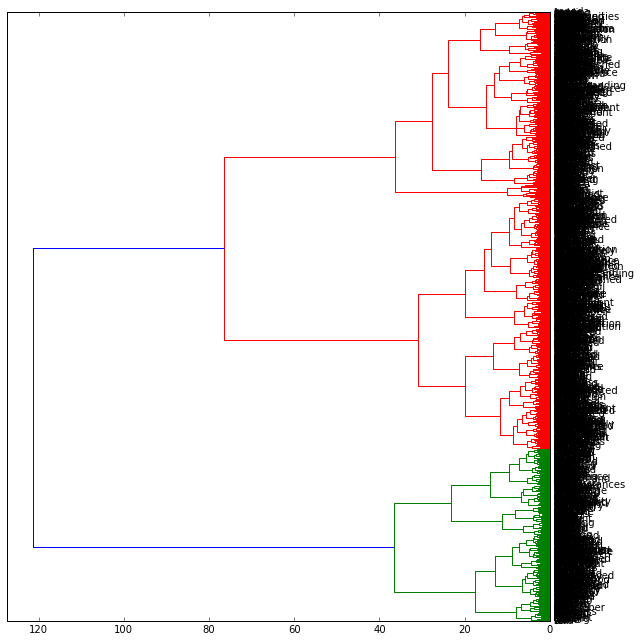

In [33]:
#distance is 1-similarity, so:

dist=1-cosine_similarity(term_document_matrix)

# ward is an algorithm for hierarchical clustering

linkage_matrix=ward(dist)

#plot dendogram

f=plt.figure(figsize=(9,9))
R=dendrogram(linkage_matrix, orientation="right", labels=vocab)
plt.tight_layout()

#OMG U...G...L...Y! 
##WHAT THE? This is nonsense
##what's the problem?

#we just tried to plot a bunch o' features!

##we need *only* the most significant words!

#way to do this: change the min_df parameter in vectorizer 
    vectorizer=TfidfVectorizer(min_df=0.5, stop_words='english', use_idf=True)
    
###more an art than a science

In [34]:
vectorizer=TfidfVectorizer(min_df=.96, stop_words='english', use_idf=True)
#try a very high min_df

In [35]:
#rerun the model
document_term_matrix=vectorizer.fit_transform(our_texts)
vocab=vectorizer.get_feature_names()

In [36]:
#check the length of the vocab
len(vocab)

52

In [37]:
#switch again to the term_document_matrix
term_document_matrix=document_term_matrix.T


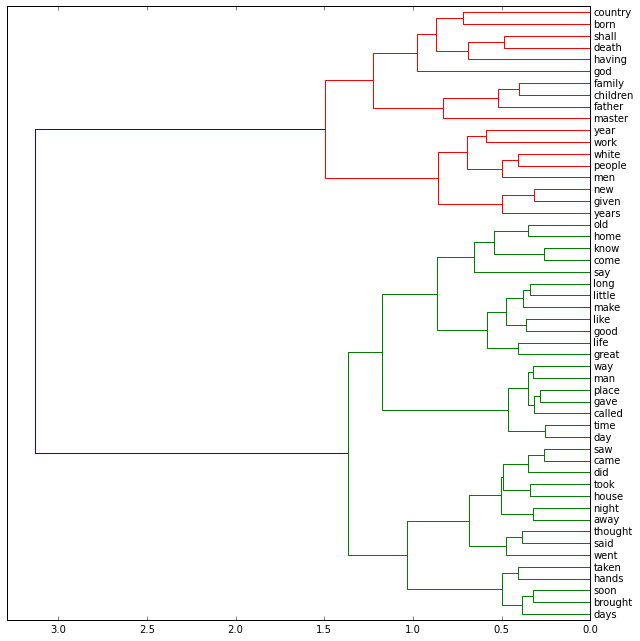

In [38]:
dist=1-cosine_similarity(term_document_matrix)
linkage_matrix=ward(dist)

#plot dendogram

f=plt.figure(figsize=(9,9))
R=dendrogram(linkage_matrix, orientation="right", labels=vocab)
plt.tight_layout()

##is this significant? Are there interesting patterns to seek out?

##here's what we're up to:

Exploratory data analysis (EDA) seeks to reveal structure, or simple descriptions, in data. We look at numbers and graphs and try to find patterns. 

. . . we can view the techniques of EDA as a ritual designed to reveal patters in a data set. Thus, we may believe that naturally occurring data sets contain structure, that EDA is a useful vehicle for revealing the structure. . . . If we make no attempt to check whether the structure could have arisen by chance, and tend to accept the findings as gospel, then the ritual comes close to magical thinking. ... a controlled form of magical thinking--in the guise of 'working hypothesis'--is a basic ingredient of scientific progress. 

- Persi Diaconis, "Theories of Data Analysis: From Magical Thinking Through Classical statistics" 

##need to elicit patterns and avoid bad magical thinking!

###Key assignment: BRAINSTORM texts you wish to mine!